In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering

In [2]:
from sklearn.datasets import make_swiss_roll
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= .5

In [3]:
X.shape

(1500, 3)

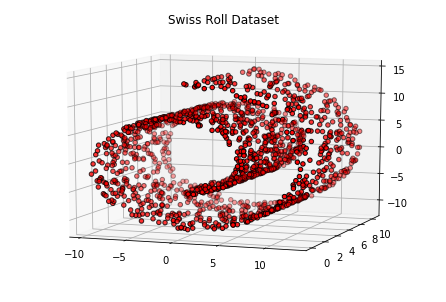

In [4]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(10, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           color='r',
           s=20, edgecolor='k')
plt.title('Swiss Roll Dataset')
plt.show()
plt.close('all')

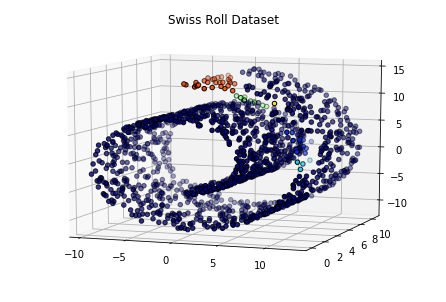

In [5]:
# this is a utility function that you can use to visualise the generated clusters.
def plot_clusters(labels):
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    ax.view_init(10, -70)
    for l in np.unique(labels):
        ax.scatter(X[labels == l, 0], 
                   X[labels == l, 1], 
                   X[labels == l, 2],
                   color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
                   s=20, edgecolor='k')
    plt.title('Swiss Roll Dataset')
    plt.show()
    plt.close('all')

# in a single line, we create the AgglomerativeClustering using a single linkage, 
# then we fit it to using our generated datapoints
single_linkage = AgglomerativeClustering(n_clusters=6, linkage='single').fit(X)
# we extract the labels (assgined clusters) corresponding to each of the datapoints
single_linkage_labels = single_linkage.labels_

# visualise the clusters
plot_clusters(single_linkage_labels)

In [6]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined in the previous cell 
# to visualise your results, you don't have to redefine it.

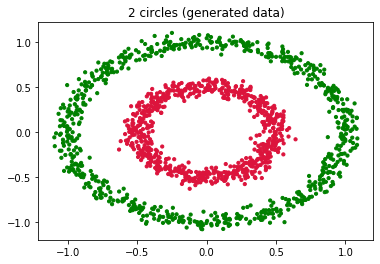

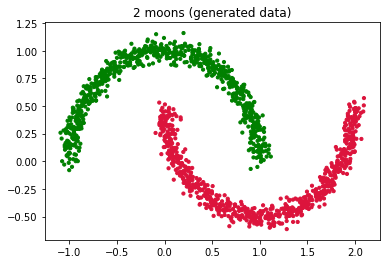

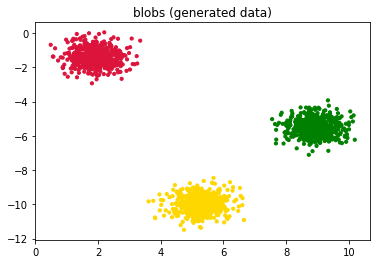

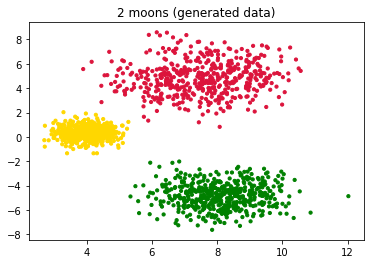

In [7]:
from sklearn import datasets
from itertools import cycle, islice

circles_points, circles_labels = datasets.make_circles(n_samples=1500, factor=0.5, noise=.05)
two_moons_points, two_moons_labels = datasets.make_moons(n_samples=1500, noise=.05)
blobs_points, blobs_labels = datasets.make_blobs(n_samples=n_samples, 
                                                 cluster_std=[.5, .5, .5],
                                                 random_state=200)
varied_points, varied_labels = datasets.make_blobs(n_samples=n_samples,
                                                   cluster_std=[1.0, 1.3, 0.5],
                                                   random_state=150)
def plot_clusters(X, labels=None, title=''):
    palette = ['green', 'crimson', 'gold', 'steelblue', 'orange']
    if labels is None:
        labels = [0] * X.shape[0]
        colors = np.array(['red'] * X.shape[0])
    else:
        colors = np.array(list(islice(cycle(palette), int(max(labels) + 1))))
    plt.figure()
    plt.scatter(X[:,0], X[:,1], s=10, color = colors[labels])
    plt.title(title)
    plt.show()

#visualise all the toy datasets
plot_clusters(circles_points, circles_labels, title='2 circles (generated data)')
plot_clusters(two_moons_points, two_moons_labels, title='2 moons (generated data)')
plot_clusters(blobs_points, blobs_labels, title='blobs (generated data)')
plot_clusters(varied_points, varied_labels, title='2 moons (generated data)')

In [8]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.
from sklearn.preprocessing import StandardScaler

ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
average = AgglomerativeClustering(n_clusters=2, linkage='average')
single = AgglomerativeClustering(n_clusters=2, linkage='single')

algorithms = [ward, complete, average, single]
names = ['ward', 'complete', 'average', 'single']

# if you're going to normalise the data, do it here, if you don't think it's necessary, go right ahead.

for alg, name in zip(algorithms, names):
    # fit the algorithm with the data
    alg.fit(None) # replace None with the data
    plot_clusters(None) # replace None with the right parameters to make the plots

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.